In [1]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "/home/xc425/project/models"

In [2]:
df = read_run_dir(run_dir)
df  # list all the runs in our run_dir

run_id               task  \
196  303d7da2-9665-4aa8-a250-ae5334975887  linear_regression   
42   622cc550-b317-4cc9-84ac-e4878f15be5d  linear_regression   
165  55ad05b4-20dc-4f44-b06d-5a43912a479e  linear_regression   
20   20df778d-9b40-41f6-855e-857db308dc61  linear_regression   
197  661e54a3-fefa-450a-8c3d-a034cbe7c086  linear_regression   
..                                    ...                ...   
24   56fc7009-1f4b-4c71-99f5-cbce00c8ce58  linear_regression   
124  b83ad19c-27a5-4eae-9a76-3fa4655febbd  linear_regression   
14   fb56e506-3bc5-4e94-96ba-6e45d0259808  linear_regression   
59   92b7f20e-46ac-4916-a896-287799769692  linear_regression   
158  b7e099d8-8fe4-42cc-925c-7ebf267b66ba  linear_regression   

                model kwargs  num_tasks  num_examples  n_dims  n_layer  \
196  Transformer-five                -1            -1       5        5   
42   Transformer-five                -1            -1       5        5   
165  Transformer-five                -1            -1       5        5   
20   Transformer-five                -1            -1       5        5   
197  Transformer-five                -1            -1       5        5   
..                ...    ...        ...           ...     ...      ...   
24     Transformer-xs                -1            -1       5        3   
124    Transformer-xs                -1            -1       5        3   
14     Transformer-xs                -1            -1       5        3   
59     Transformer-xs                -1            -1       5        3   
158    Transformer-xs                -1            -1       5        3   

     n_head                       run_name  
196       8       linear_regression_five_1  
42        8      linear_regression_five_10  
165       8      linear_regression_five_10  
20        8      linear_regression_five_10  
197       8      linear_regression_five_10  
..      ...                            ...  
24        2  linear_regression_tiny_try2nd  
124       2  linear_regression_tiny_try3rd  
14        2  linear_regression_tiny_try4th  
59        2  linear_regression_tiny_try4th  
158       2  linear_regression_tiny_try4th  

[205 rows x 10 columns]

In [5]:
task = "linear_regression"
#task = "sparse_linear_regression"
#task = "decision_tree"
#task = "relu_2nn_regression"

run_id = "16975875-0068-4b39-8ec4-945ebff46e90"  # if you train more models, replace with the run_id from the table above

run_path = os.path.join(run_dir, task, run_id)
recompute_metrics = False

if recompute_metrics:
    get_run_metrics(run_path)  # these are normally precomputed at the end of training

# Plot pre-computed metrics

linear_regression_five_stackxy_15d_500ex_1 16975875-0068-4b39-8ec4-945ebff46e90


100%|██████████| 15/15 [00:00<00:00, 212549.19it/s]

{'half_subspace': {'Transformer-five': {'mean': [5.280775970580483e-08, 7.788592787013234e-08, 7.610825226341452e-08, 1.09094541282199e-07, 8.532362395878105e-08, 1.0201266983737393e-07, 8.183653790183599e-08, 8.880006892771537e-08, 1.0071604871579135e-07, 9.422265823862594e-08, 8.575939318689052e-08, 8.972226623882307e-08, 8.929643324033046e-08, 1.0366515349839271e-07, 9.927611396657691e-08, 1.0149969966732897e-07, 9.331841586875574e-08, 9.200763694631556e-08, 1.005251381987667e-07, 1.8287640462707108e-07, 8.000671793221651e-08, 1.0627259901715054e-07, 8.655137359407187e-08, 9.107387389425034e-08, 1.0114061600082399e-07, 1.0097041922563221e-07, 1.0240990680661828e-07, 9.355915153719252e-08, 8.867145121863966e-08, 9.359494015370729e-08, 8.54465118512356e-08, 1.0396931126403311e-07, 9.942221671129421e-08, 1.0034088215131002e-07, 1.5219581352236371e-07, 9.428966526077905e-08, 9.497901676998785e-08, 9.760307572529806e-08, 1.1120636524234821e-07, 1.5027180779725314e-07, 9.09525321427888e-0

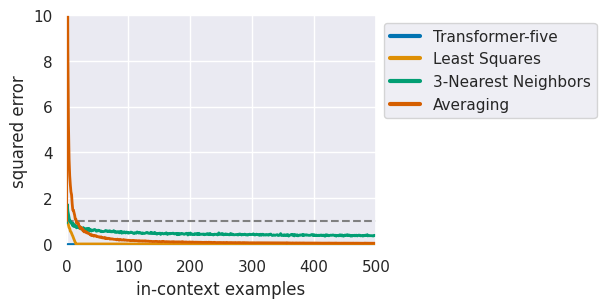

In [6]:
def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row)
print(metrics)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

models = relevant_model_names[task]
basic_plot(metrics["standard"], models=models)
plt.show()

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [1.1597311655680338, 0.8422190348307291, 0.7538611729939778, 0.5803356170654297, 0.41191031138102213, 0.3059666633605957, 0.19980618158976238, 0.11350951194763184, 0.06576481660207113, 0.04669696489969889, 0.05410172939300537, 0.05801379680633545, 0.08351876735687255, 0.09812340736389161, 0.1457252820332845, 0.16347055435180663, 0.20572805404663086, 0.23325249354044597, 0.25459152857462564, 0.28985233306884767, 0.3065027236938477, 0.32848873138427737, 0.33686641057332356, 0.3524604797363281, 0.36422484715779624, 0.3962168375651042, 0.4219593365987142, 0.38255834579467773, 0.41922146479288735, 0.41370410919189454, 0.43323373794555664, 0.4330347696940104, 0.40837876001993817, 0.4277896563212077, 0.4041383107503255, 0.4268100420633952, 0.44503215154012044, 0.44670883814493817, 0.4354634602864583, 0.424615478515625, 0.42061230341593425, 0.4083257039388021, 0.45378907521565753, 0.44872283

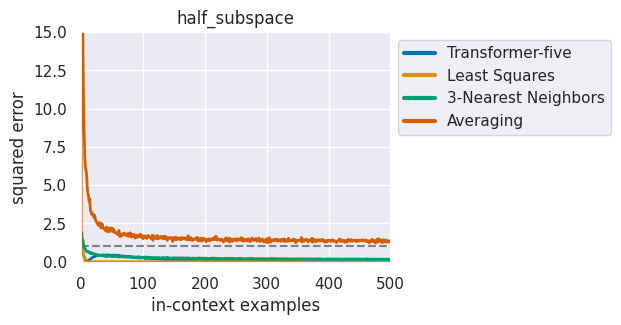

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [1.0167086919148762, 0.9445978800455729, 0.9125886917114258, 0.8076171875, 0.8137641270955404, 0.7120850880940756, 0.7052997589111328, 0.6275766372680665, 0.533578618367513, 0.588072141011556, 0.5350329717000325, 0.46183242797851565, 0.45913508733113606, 0.38778152465820315, 0.3804496765136719, 0.36539948781331383, 0.2919835090637207, 0.2977108955383301, 0.2559447924296061, 0.25535486539204916, 0.2526122252146403, 0.23546266555786133, 0.21839739481608073, 0.20642476081848143, 0.18726307551066082, 0.18467968304951984, 0.17576184272766113, 0.17156750361124676, 0.14960333506266277, 0.15022541681925455, 0.14928417205810546, 0.1492239475250244, 0.1495437781016032, 0.14216702779134113, 0.13434565862019857, 0.13595477739969888, 0.1289359172185262, 0.13533576329549155, 0.12772996425628663, 0.12375105222066243, 0.12321305274963379, 0.1234728733698527, 0.13292531172434488, 0.10881501833597819,

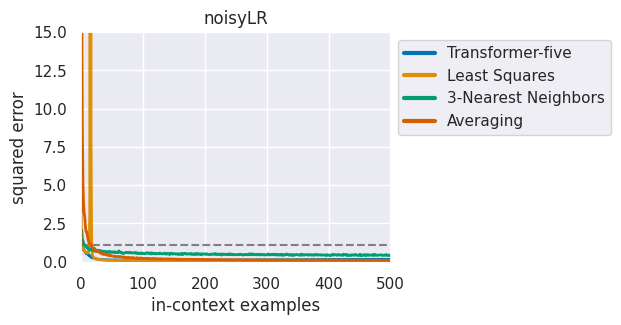

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [1.0215730667114258, 1.0779885609944662, 1.0185886383056642, 0.939907964070638, 0.9251019159952799, 1.0246687571207682, 1.020561408996582, 1.0345165252685546, 0.9822594960530598, 1.0026063919067383, 1.019141960144043, 1.121701685587565, 1.010523796081543, 0.9779317220052083, 0.9440497080485026, 0.0009709007417162259, 0.0008812319487333298, 0.0008328081419070562, 0.0008044367035230001, 0.0007944207017620404, 0.0008665380999445915, 0.0007980593790610631, 0.0007631325473388036, 0.0007350208237767219, 0.0006767670934398969, 0.0007666594038407008, 0.0007550433898965517, 0.0007354168221354485, 0.0007056837280591329, 0.0006191026419401169, 0.0007314668968319893, 0.000748955582578977, 0.0007485706359148025, 0.0007038762172063192, 0.0005644024660189946, 0.0006940718740224838, 0.0007502291351556778, 0.000762465720375379, 0.0006998705367247264, 0.0005499264225363731, 0.0006890283897519111, 0.00

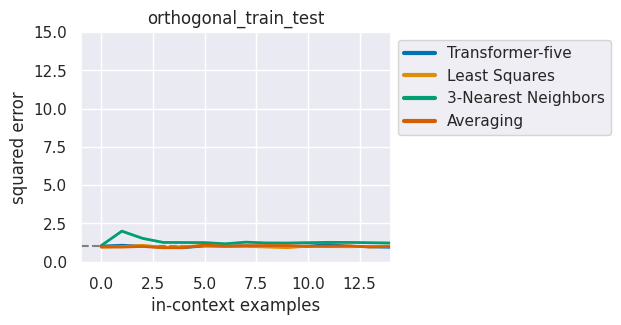

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [0.9630851109822591, 0.015464804569880168, 0.01066702405611674, 0.008610079685846964, 0.007375221947828929, 0.007345655063788096, 0.007319955031077067, 0.006036240855852763, 0.006402709086736043, 0.0068922256429990135, 0.008070459465185802, 0.00712269643942515, 0.009052366018295288, 0.008760743339856466, 0.009779561559359233, 0.010030017296473185, 0.010398255785306294, 0.010017946362495422, 0.009152554472287496, 0.008456688125928242, 0.008739795287450154, 0.008320239186286927, 0.008633386095364888, 0.007127311825752258, 0.0063952376445134485, 0.0071757843097050985, 0.00677629957596461, 0.006484624743461609, 0.005799340208371481, 0.005645402272542318, 0.005738403896490733, 0.005544542769591014, 0.005409960945447286, 0.005552270511786143, 0.004730817178885142, 0.005254832406838735, 0.004653724034627279, 0.004931341608365377, 0.00461030254761378, 0.0044028013944625854, 0.004774136344591

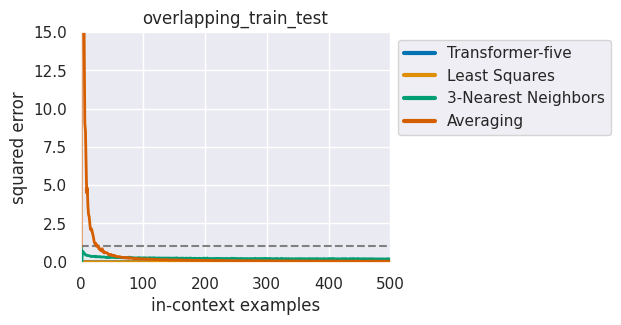

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [0.995068359375, 0.987423833211263, 0.9059200922648112, 0.8001096725463868, 0.7635231653849284, 0.6751181284586588, 0.6357529958089193, 0.5662365595499674, 0.514548397064209, 0.5569547653198242, 0.5338670094807942, 0.557287851969401, 0.572281010945638, 0.642969258626302, 0.6205121994018554, 0.7291200002034505, 0.7710642496744792, 0.848084831237793, 0.9482570648193359, 0.8814985911051433, 1.0381727854410807, 1.0864330291748048, 1.1981764475504557, 1.3913560231526694, 1.3304552714029947, 1.3052257537841796, 1.2948824564615886, 1.40161984761556, 1.3903483072916667, 1.4404741923014324, 1.5352443695068358, 1.5509180704752603, 1.5318358103434244, 1.5086840311686198, 1.6001725514729819, 1.6478225708007812, 1.6416497548421225, 1.7758979797363281, 1.7609636942545572, 1.729168701171875, 1.7940996805826823, 1.7165866851806642, 1.792682902018229, 1.7998620351155599, 1.9080858866373698, 1.8462426

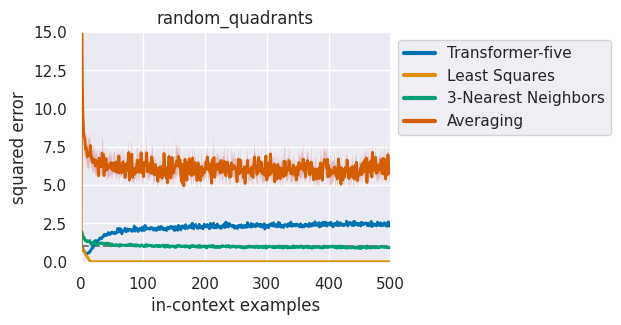

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [0.10938553015391032, 0.1024590253829956, 0.10676685174306234, 0.09716978867848715, 0.09307581583658854, 0.07509558995564779, 0.06732329527537027, 0.05745975971221924, 0.05436225334803264, 0.045619813601175944, 0.04130292336146037, 0.03523554007212321, 0.033965424696604414, 0.025645673274993896, 0.022571082909901938, 0.01871633728345235, 0.017694552739461262, 0.01553184986114502, 0.012664816776911418, 0.012250600258509318, 0.01052875816822052, 0.010016841689745586, 0.008463406562805175, 0.007366393506526947, 0.007715726892153422, 0.0071674759189287824, 0.007034793496131897, 0.006377945840358734, 0.006327324608961741, 0.006047119200229645, 0.005273854235808054, 0.005447613199551901, 0.005288790663083394, 0.004555354515711467, 0.004918461541334788, 0.004297503332297007, 0.00505551795164744, 0.004342432816823324, 0.004520845413208008, 0.004130154103040695, 0.004668782154719035, 0.004374

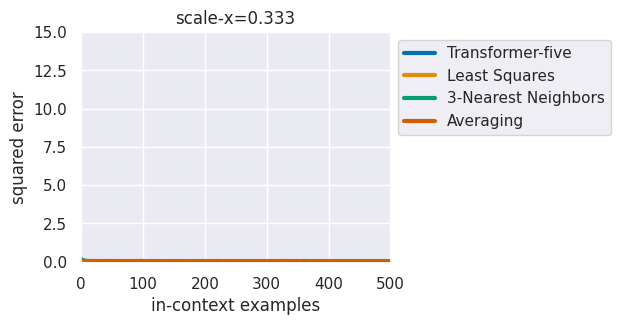

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [0.24859285354614258, 0.22673800786336262, 0.21926671663920086, 0.21660558382670084, 0.19428067207336425, 0.16508763631184895, 0.14880156517028809, 0.1388463020324707, 0.11887173652648926, 0.10512102444966634, 0.08821489016215006, 0.08391431172688803, 0.06175764004389445, 0.052815334002176924, 0.045558834075927736, 0.036958030859629315, 0.030630073944727578, 0.024560006459554036, 0.01902759273846944, 0.017814040184020996, 0.015539633234341939, 0.012260007858276366, 0.012491565942764283, 0.010936854283014934, 0.00984674592812856, 0.008768709500630696, 0.007497652371724447, 0.0075412144263585406, 0.006115822990735372, 0.0065692459543546045, 0.005922895669937134, 0.0058686251441637674, 0.005622790257136027, 0.004708352188269298, 0.004883534709612529, 0.004960726698239644, 0.004383275409539541, 0.0041396891077359515, 0.004091941565275192, 0.004414810736974081, 0.0036435479919115703, 0.00

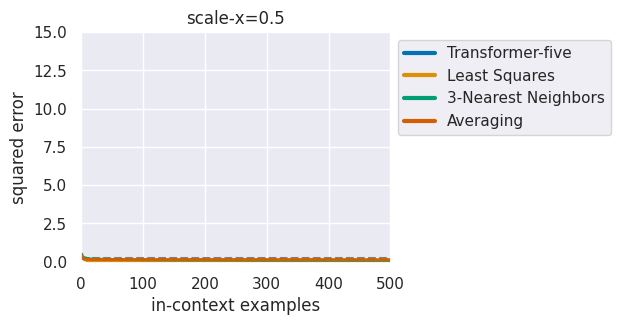

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [3.9764689127604167, 3.6197463989257814, 3.2855148315429688, 3.0445470174153644, 2.937541198730469, 2.849969991048177, 2.431756337483724, 2.393249003092448, 2.018360392252604, 1.7972145080566406, 1.453557586669922, 1.4235687255859375, 1.1825233459472657, 1.0515249888102214, 0.9432422637939453, 0.769776980082194, 0.7179728190104167, 0.7339979807535807, 0.5399285634358724, 0.4959721883138021, 0.5109643618265788, 0.4739387512207031, 0.4180793762207031, 0.42034244537353516, 0.3527324358622233, 0.3753472010294596, 0.3814711570739746, 0.34159259796142577, 0.3777668317159017, 0.31127541859944663, 0.3533794403076172, 0.4439414024353027, 0.32263129552205405, 0.35653874079386394, 0.3522721608479818, 0.36676530838012694, 0.3420289675394694, 0.38759517669677734, 0.36381727854410806, 0.3120660463968913, 0.34580758412679036, 0.3702479998270671, 0.3393013636271159, 0.3481499671936035, 0.33554935455

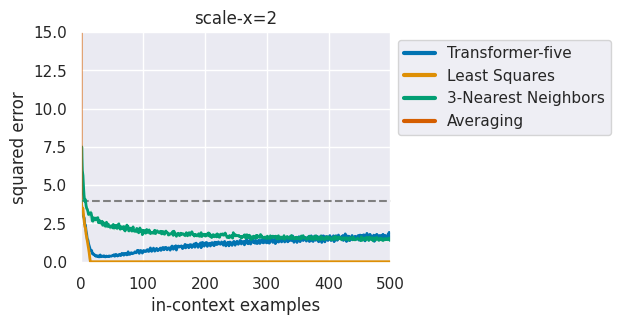

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [8.953721110026041, 8.539274088541667, 8.094716898600261, 7.695986429850261, 7.222653706868489, 6.3135732014973955, 6.383191935221354, 5.588260904947917, 5.652322387695312, 5.390079243977865, 5.23886973063151, 4.916876729329427, 4.356666056315104, 4.518157958984375, 4.698859151204427, 3.8299463907877604, 4.186576334635417, 3.9511955261230467, 3.6105870564778644, 3.6044209798177085, 3.64613774617513, 3.647119903564453, 3.8550033569335938, 3.5959709167480467, 3.2160443623860675, 3.179490661621094, 3.442521667480469, 3.534870910644531, 3.716344451904297, 3.574408467610677, 3.743590799967448, 3.6987068176269533, 3.4404037475585936, 3.7851053873697915, 3.9619776407877603, 3.4829190572102866, 3.694476826985677, 3.876043192545573, 3.9416244506835936, 3.809783935546875, 3.52136713663737, 3.9931131998697915, 3.8797154744466145, 3.8992851257324217, 3.7861401875813803, 4.024997202555339, 3.3323

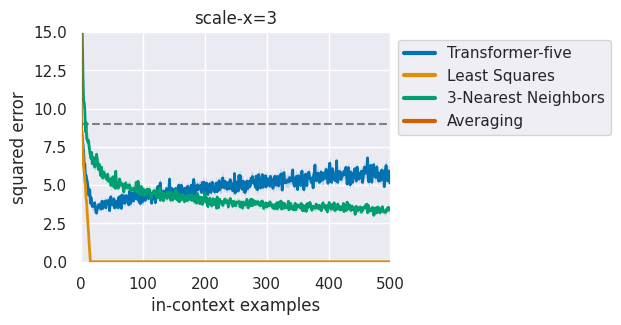

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [0.11428745587666829, 0.1055775006612142, 0.09799368381500244, 0.08997427622477214, 0.08380346298217774, 0.07485628922780355, 0.06551413138707479, 0.058394292990366616, 0.05691105524698893, 0.047274295488993326, 0.038437732060750324, 0.03519447247187297, 0.029070234298706053, 0.02755840023358663, 0.022177104155222574, 0.01699904998143514, 0.014746087789535522, 0.012068761388460796, 0.009256885449091593, 0.009568002820014954, 0.008862891793251037, 0.007707291344801585, 0.006289175152778626, 0.005889509618282318, 0.004653460780779521, 0.0044682453076044714, 0.0048039252559343975, 0.003931293388207754, 0.0035410073896249136, 0.0034268466134866078, 0.0030093794067700703, 0.0030435070395469664, 0.002661390354235967, 0.002614982177813848, 0.002565143754084905, 0.002580392360687256, 0.002330050617456436, 0.0023138401408990222, 0.002036612977584203, 0.002115451792875926, 0.002158132195472717

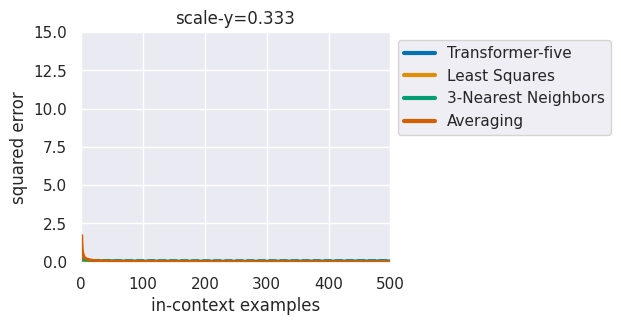

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [0.2682922045389811, 0.2425598939259847, 0.22097558975219728, 0.18461923599243163, 0.18104791641235352, 0.17252465883890789, 0.15207649866739908, 0.1400740623474121, 0.13102002143859864, 0.10368084112803141, 0.09203944206237794, 0.07322998046875, 0.0638905127843221, 0.05075741608937581, 0.04490596055984497, 0.034758710861206056, 0.028376573324203493, 0.020627331733703614, 0.02195240060488383, 0.015027257800102233, 0.014234791199366251, 0.01173908809820811, 0.008382282654444377, 0.00857422947883606, 0.0076551487048467, 0.007361158728599548, 0.006150460739930471, 0.005677870412667593, 0.004998485247294108, 0.0046045770247777305, 0.004728246728579203, 0.004352418084939321, 0.004019453873236974, 0.0035899365941683453, 0.003373057891925176, 0.003567806879679362, 0.0031408098836739856, 0.0034198482831319173, 0.0032160863280296325, 0.0029295014838377634, 0.0027724618713061014, 0.00306152825

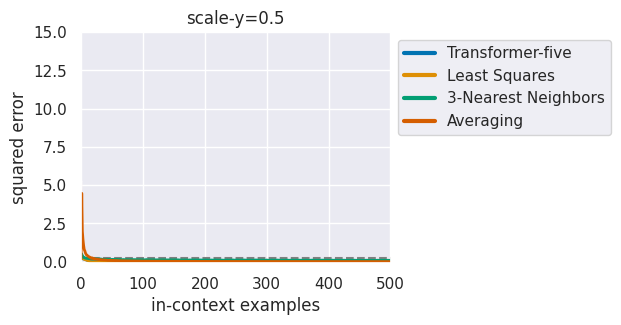

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [3.7166511535644533, 3.518962860107422, 3.6443216959635416, 3.475311787923177, 3.0458414713541666, 2.552653503417969, 2.523839823404948, 2.2021191914876304, 1.854675547281901, 1.618534469604492, 1.4211311340332031, 1.2622362772623699, 1.1514776865641276, 0.9365480422973633, 0.7885302861531576, 0.700192642211914, 0.594455337524414, 0.5055224736531575, 0.43505818049112954, 0.3852659543355306, 0.3578947067260742, 0.27910931905110675, 0.2794737180074056, 0.24974788029988607, 0.2272423267364502, 0.23825785319010417, 0.19699759483337403, 0.18585602442423502, 0.14185490608215331, 0.1454793612162272, 0.15015548070271809, 0.12101117769877116, 0.1805079778035482, 0.12833290100097655, 0.1166229009628296, 0.11714326540629069, 0.09419337908426921, 0.11343345642089844, 0.0977449099222819, 0.12161704699198404, 0.10096085866292318, 0.1337642987569173, 0.09900904496510823, 0.10052384535471598, 0.1002

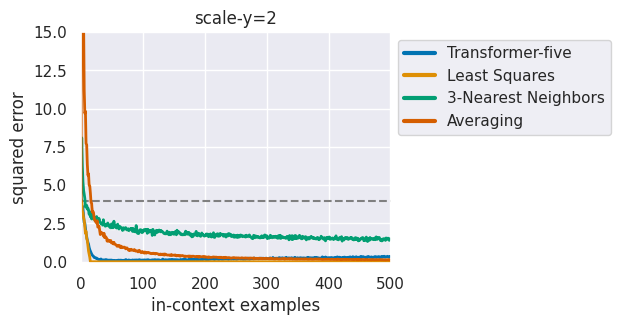

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [8.551959228515624, 8.655055745442708, 8.592368570963542, 7.828174845377604, 7.615693155924479, 6.477104695638021, 5.637198384602865, 5.3812006632486975, 5.0292816162109375, 4.379437255859375, 4.16433842976888, 4.068878936767578, 3.406452941894531, 3.1135902404785156, 2.9230168660481772, 2.7740076700846354, 2.439892069498698, 2.3877029418945312, 2.2047518412272136, 2.0737545013427736, 1.8294034322102866, 1.9333835601806642, 1.8328338623046876, 1.7637051900227865, 1.5692736307779949, 1.6800941467285155, 1.5201595306396485, 1.4790560404459636, 1.6283954620361327, 1.518364715576172, 1.3381813049316407, 1.3615523020426432, 1.4983168284098307, 1.3010993957519532, 1.294689687093099, 1.222940190633138, 1.3277970631917317, 1.185187276204427, 1.1635011037190754, 1.1885536193847657, 1.0667457580566406, 1.1081871032714843, 1.1372895558675131, 1.103130849202474, 1.1760445912679036, 1.24039154052

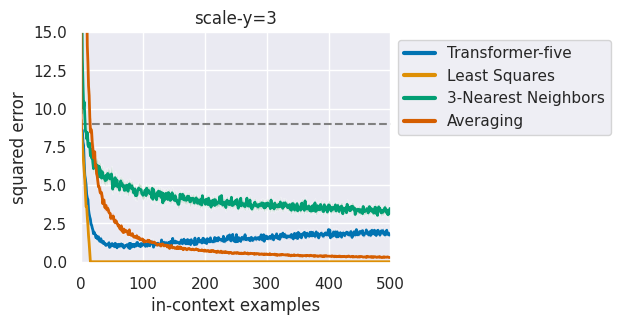

['Transformer-five', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-five': {'mean': [1.0107203165690104, 0.6013306935628255, 0.4756608009338379, 0.3518644332885742, 0.2583142280578613, 0.248328431447347, 0.17629125912984211, 0.1885891278584798, 0.22304697036743165, 0.28488931655883787, 0.32993335723876954, 0.3795680046081543, 0.4229044596354167, 0.4753200213114421, 0.5150154113769532, 0.6097709019978841, 0.6465445200602213, 0.601937739054362, 0.6172893524169922, 0.6411510467529297, 0.6397242228190104, 0.6331794102986653, 0.7013687133789063, 0.7021591186523437, 0.7024409612019856, 0.6947053273518881, 0.7253382364908855, 0.7182874043782552, 0.7095277786254883, 0.6553282419840495, 0.6981187184651693, 0.7562522252400716, 0.7206199645996094, 0.7567643483479818, 0.7516339619954427, 0.7514590581258138, 0.8433951695760091, 0.8144750595092773, 0.7602417627970378, 0.8265364329020183, 0.8591391245524088, 0.7275918960571289, 0.827061144510905, 0.8767683664957683, 0.823547426859

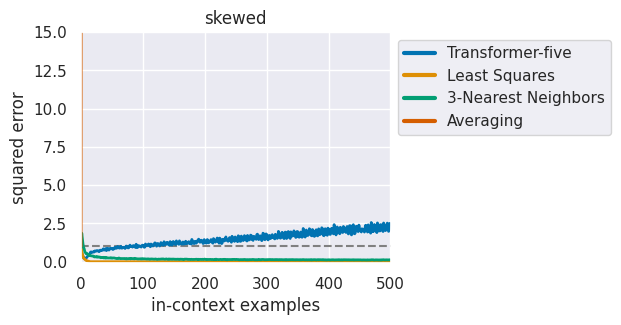

In [22]:
# plot any OOD metrics
for name, metric in metrics.items():
    if name == "standard": continue
   
    if "scale" in name:
        scale = float(name.split("=")[-1])**2
    else:
        scale = 1.0

    trivial = 1.0 if "noisy" not in name else (1+1/n_dims)
    fig, ax = basic_plot(metric, models=models, trivial=trivial * scale)
    ax.set_title(name)
    
    if "ortho" in name:
        ax.set_xlim(-1, n_dims - 1)
    # ax.set_ylim(-.1 * scale, 1.5 * scale)

    plt.show()

# Interactive setup

We will now directly load the model and measure its in-context learning ability on a batch of random inputs. (In the paper we average over multiple such batches to obtain better estimates.)

In [6]:
from samplers import get_data_sampler
from tasks import get_task_sampler

In [7]:
model, conf = get_model_from_run(run_path)

n_dims = conf.model.n_dims
batch_size = conf.training.batch_size

data_sampler = get_data_sampler(conf.training.data, n_dims)
task_sampler = get_task_sampler(
    conf.training.task,
    n_dims,
    batch_size,
    **conf.training.task_kwargs
)

In [8]:
task = task_sampler()
xs = data_sampler.sample_xs(b_size=batch_size, n_points=conf.training.curriculum.points.end)
ys = task.evaluate(xs)

In [9]:
with torch.no_grad():
    pred = model(xs, ys)

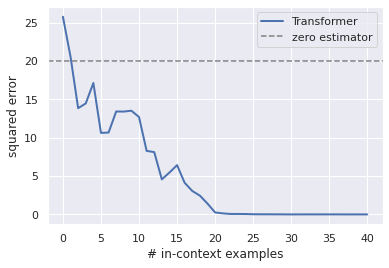

In [10]:
metric = task.get_metric()
loss = metric(pred, ys).numpy()

sparsity = conf.training.task_kwargs.sparsity if "sparsity" in conf.training.task_kwargs else None
baseline = {
    "linear_regression": n_dims,
    "sparse_linear_regression": sparsity,
    "relu_2nn_regression": n_dims,
    "decision_tree": 1,
}[conf.training.task]

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

As an exploration example, let's see how robust the model is to doubling all the inputs.

In [11]:
xs2 = 2 * xs
ys2 = task.evaluate(xs2)
with torch.no_grad():
    pred2 = model(xs2, ys2)

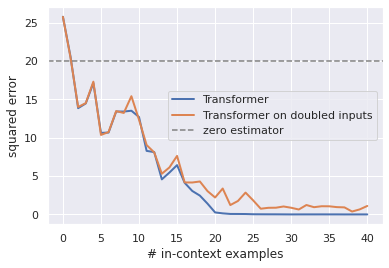

In [12]:
loss2 = metric(pred2, ys2).numpy()

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.plot(loss2.mean(axis=0) / 4, lw=2, label="Transformer on doubled inputs")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

The error does increase, especially when the number of in-context examples exceeds the dimension, but the model is still relatively accurate.